In [11]:
import pandas as pd
import string
from optimizedApproachAlgorithm import *
from helperFunctions import *
from matplotlib import pyplot as plt
import numpy as np

In [3]:
# Read in the data
df_tweets = pd.read_csv("../data/tweets.csv")


In [4]:
df_tweets.head()

,content
0,Love it!
1,So awesome. Read my morning meditation anytime...
2,"Just replaced one add with another, albeit AA ..."
3,Don't bother upgrading. There is zero differen...
4,Every time I go to share the reading it pops u...


In [5]:
tweets = df_tweets['content'].tolist()
df_tweets.head()

,content
0,Love it!
1,So awesome. Read my morning meditation anytime...
2,"Just replaced one add with another, albeit AA ..."
3,Don't bother upgrading. There is zero differen...
4,Every time I go to share the reading it pops u...


In [6]:
# Read in the data
df_abbreviations = pd.read_csv("../data/common_abb_keyword.csv")

In [7]:
df_abbreviations.head()

,Acronym,Expansion
0,2day,today
1,2m2h,too much too handle
2,2moro,tomorrow
3,2nite,tonight
4,4eae,for ever and ever


In [ ]:
abbreviations_dict = df_abbreviations.set_index('Acronym')['Expansion'].to_dict()
abbreviations_dict

In [12]:
#run the algorithm
n = 400000
results = replace_abbreviations(tweets[:n], abbreviations_dict)

#for i in range(n):
   # print(tweets[i])
    #print(results[i])

In [13]:
# # Generate some evaluation points
# #tVals is a list of values of possible number of tweets
# tVals = [2**k for k in range(9)] 
# tVals += [k*10 for k in range(20)]
# tVals += [k*60 for k in range(2,50)]
# tVals.sort() # put them in order
# print(tVals)

[0, 1, 2, 4, 8, 10, 16, 20, 30, 32, 40, 50, 60, 64, 70, 80, 90, 100, 110, 120, 120, 128, 130, 140, 150, 160, 170, 180, 180, 190, 240, 256, 300, 360, 420, 480, 540, 600, 660, 720, 780, 840, 900, 960, 1020, 1080, 1140, 1200, 1260, 1320, 1380, 1440, 1500, 1560, 1620, 1680, 1740, 1800, 1860, 1920, 1980, 2040, 2100, 2160, 2220, 2280, 2340, 2400, 2460, 2520, 2580, 2640, 2700, 2760, 2820, 2880, 2940]


In [16]:
#generate list of input sizes
tVals = [2**k for k in range(9)]
tVals += [k*10 for k in range(20)]
tVals += [k*60 for k in range(2,50)]
tVals += [k*3600 for k in range(2,100)] # add values in seconds
tVals = sorted(list(set(tVals))) # put them in order and remove duplicates
tVals = [t for t in tVals if t <= 400000] # filter out values greater than 400000
print(tVals)


[0, 1, 2, 4, 8, 10, 16, 20, 30, 32, 40, 50, 60, 64, 70, 80, 90, 100, 110, 120, 128, 130, 140, 150, 160, 170, 180, 190, 240, 256, 300, 360, 420, 480, 540, 600, 660, 720, 780, 840, 900, 960, 1020, 1080, 1140, 1200, 1260, 1320, 1380, 1440, 1500, 1560, 1620, 1680, 1740, 1800, 1860, 1920, 1980, 2040, 2100, 2160, 2220, 2280, 2340, 2400, 2460, 2520, 2580, 2640, 2700, 2760, 2820, 2880, 2940, 7200, 10800, 14400, 18000, 21600, 25200, 28800, 32400, 36000, 39600, 43200, 46800, 50400, 54000, 57600, 61200, 64800, 68400, 72000, 75600, 79200, 82800, 86400, 90000, 93600, 97200, 100800, 104400, 108000, 111600, 115200, 118800, 122400, 126000, 129600, 133200, 136800, 140400, 144000, 147600, 151200, 154800, 158400, 162000, 165600, 169200, 172800, 176400, 180000, 183600, 187200, 190800, 194400, 198000, 201600, 205200, 208800, 212400, 216000, 219600, 223200, 226800, 230400, 234000, 237600, 241200, 244800, 248400, 252000, 255600, 259200, 262800, 266400, 270000, 273600, 277200, 280800, 284400, 288000, 291600, 

In [17]:
tValsRec, timeValsRec = calculateTimeForEachN(replace_abbreviations, tVals, tweets, abbreviations_dict, numTrials=5)

C:\Users\andy\AppData\Local\Temp\ipykernel_7184\405959810.py:5: RuntimeWarning: divide by zero encountered in log
  plt.plot(tValsRec, [  coeffs[3] +coeffs[2]*t + coeffs[1]*t**2 + coeffs[0]*(t**2)*(np.log(t)) for t in tValsRec], color="purple", label="polynomial fit")
C:\Users\andy\AppData\Local\Temp\ipykernel_7184\405959810.py:5: RuntimeWarning: invalid value encountered in double_scalars
  plt.plot(tValsRec, [  coeffs[3] +coeffs[2]*t + coeffs[1]*t**2 + coeffs[0]*(t**2)*(np.log(t)) for t in tValsRec], color="purple", label="polynomial fit")


Text(0.5, 1.0, 'Keyword Replacement Algorithm')

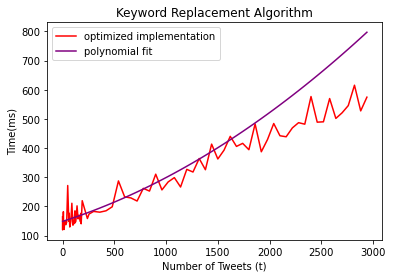

In [85]:
plt.plot(tValsRec, timeValsRec, color="red", label="optimized implementation")
if True:
    coeffs = np.polyfit( tValsRec, timeValsRec, 3 )
    plt.plot(tValsRec, [  coeffs[3] +coeffs[2]*t + coeffs[1]*t**2 + coeffs[0]*(t**2)*(np.log(t)) for t in tValsRec], color="purple", label="polynomial fit")
   
plt.xlabel("Number of Tweets (t)")
plt.ylabel("Time(ms)")
plt.legend()
plt.title("Keyword Replacement Algorithm")